# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Malisyah Nadya Marvini]

##Analisis data dan Perannya

 Analisis data adalah serangkaian proses pengolahan data yang meliputi pembersihan, pemeriksaan, transformasi, dan pemodelan data dengan tujuan menemukan informasi yang berguna, menarik kesimpulan, dan mendukung pengambilan keputusan.

 peranannnya adalah sebagai sumber informasi yang menjadi dasar dalam pengambilan keputusan yang objektif untk meminimalisir resiko resiko yang ada serta meningkatkan efisiensi terhadap optimalisasi sumber daya

## Menentukan Pertanyaan Bisnis

- Kota mana yang memiliki jumlah customers terbanyak?
- 

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Wrangling

Data wrangling dan data cleaning sangat penting dilakukan sebelum analisis lanjutan karena kualitas hasil analisis bergantung pada kualitas data yang digunakan.

Data wrangling berfokus pada menata dan mentransformasikan data ke format yang siap dianalisis, misalnya mengubah tipe data, menggabungkan dataset, atau membuat fitur baru.

Data cleaning memastikan data bebas dari kesalahan seperti nilai hilang, duplikasi, outlier tidak wajar, dan data tidak konsisten, sehingga analisis tidak menghasilkan kesimpulan yang menyesatkan.

Tanpa proses ini, analisis lanjutan seperti EDA atau pengambilan keputusan berisiko tidak akurat dan sulit diinterpretasikan.

### Gathering Data

In [3]:
path = 'Data/'

customers_df = pd.read_csv(path + 'olist_customers_dataset.csv')
orders_df = pd.read_csv(path + 'olist_orders_dataset.csv')
order_items_df = pd.read_csv(path + 'olist_order_items_dataset.csv')
products_df = pd.read_csv(path + 'olist_products_dataset.csv')

print("Gathering Data Berhasil!")

Gathering Data Berhasil!


In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- dari dataset yang tersedia, dipakai 4 file yang memiliki informasi terkait dengan pertanyaan bisnis

### Assessing Data

In [8]:
customers_df.info()

print("Missing Value :\n",customers_df.isna().sum())
print("Duplicate Value :",customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Missing Value :
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicate Value : 0


In [9]:
orders_df.info()

print("Missing Value :\n",orders_df.isna().sum())
print("Duplicate Value :",orders_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Missing Value :
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_c

In [10]:
order_items_df.info()

print("Missing Value :\n",order_items_df.isna().sum())
print("Duplicate Value :",order_items_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Missing Value :
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplicate Value : 0


In [11]:
products_df.info()

print("Missing Value :\n",products_df.isna().sum())
print("Duplicate Value :",products_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Missing Value :
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g          

**Insight:**


1. Masalah Tipe Data
- Kolom tanggal pada orders_df dan order_items_df (seperti order_purchase_timestamp dan shipping_limit_date) bertipe object (teks).
- Perlu dikonversi ke datetime agar bisa dianalisis berdasarkan waktu (hari, bulan, jam).

2. Nilai Kosong (Missing Values)
- orders_df: Terdapat banyak data kosong pada kolom pengiriman. products_df: Terdapat 610 data kosong pada product_category_name.
- Data kosong ini menunjukkan pesanan yang belum selesai diproses atau informasi produk yang tidak lengkap, yang dapat memengaruhi akurasi analisis kategori dan logistik.

3. Duplikasi
- Tidak ditemukan data duplikat (0 Duplicate Value) pada keempat tabel utama.
- Data memiliki integritas yang baik dan setiap baris mewakili transaksi unik, sehingga aman untuk perhitungan statistik.

### Cleaning Data

In [12]:
# Mengubah tipe data kolom di orders_df menjadi datetime
datetime_columns_orders = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in datetime_columns_orders:
  orders_df[column] = pd.to_datetime(orders_df[column])

# Mengubah tipe data kolom di order_items_df menjadi datetime
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

# cek
print(orders_df.dtypes)
print(order_items_df.dtypes)

# Menangani missing value pada tabel products
numeric_cols = [
    'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm'
]

# Imputasi dengan median
for col in numeric_cols:
    products_df[col].fillna(products_df[col].median(), inplace=True)

# Imputasi dengan nilai 'unknown'
products_df["product_category_name"].fillna(value="unknown", inplace=True)

# cek
print(products_df.isna().sum())


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_31328\3919545689.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df[col].fillna(products_df[col].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_31328\3919545689.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

**Insight:**
1. Mengubah tipe data date time
- Seluruh kolom tanggal pada tabel orders (seperti waktu pembelian dan pengiriman) serta order_items (batas pengiriman) telah dikonversi dari tipe object (teks) menjadi datetime.
- data dapat difilter berdasarkan bulan atau tahun untuk melihat apakah kota tertentu atau kategori produk tertentu mengalami kenaikan pendapatan di periode tertentu.

2. Imputasi pada kolom product_category_name
- Sebanyak 610 produk yang tidak memiliki kategori telah diberi label "unknown" alih-alih dihapus.
- Hal ini memastikan perhitungan pendapatan tertinggi tetap akurat 100% karena tidak ada transaksi yang terbuang hanya karena nama kategorinya hilang.
- nilai kosong pada kolom dimensi, berat (2 data), dan atribut teknis seperti product_photos_qty (610 data) diimputasi menggunakan median.
3. Membiarkan status operasional tetap kosong
- Data kosong pada tanggal pengiriman tetap dibiarkan (NaN) untuk menjaga keaslian status pesanan yang belum selesai atau dibatalkan.
- Penentuan kota dengan pelanggan terbanyak tetap valid karena identitas lokasi pelanggan tidak bergantung pada apakah barang tersebut sudah sampai atau belum.

4. Tidak ada data duplikat
- Karena tidak ditemukan duplikasi sejak tahap awal, data setiap pelanggan dan transaksi dipastikan unik.
- Perhitungan jumlah pelanggan per kota tidak akan membengkak akibat data ganda.

In [13]:
# Menggabungkan customers dengan orders
df = pd.merge(
    left = customers_df,
    right = orders_df,
    how="left",
    on="customer_id"
)

# Menggabungkan dengan order_items
df = pd.merge(
    left = df,
    right = order_items_df,
    how = "left",
    on = "order_id"
)

# Menggabungkan dengan products
df = pd.merge(
    left=df,
    right=products_df,
    how="left",
    on="product_id"
)

# cek
print(df.isnull().sum())
print(df.duplicated().sum())

# Menghapus baris missing value pada kolom price dan product_category_name
df.dropna(subset=['price','product_category_name'], inplace=True)

print(df.info())

# Memilih fitur terkait pertanyaan bisnis
df = df[[
    # Pertanyaan 1
    'customer_unique_id',
    'customer_city',
    # Pertanyaan 2
    'product_category_name',
    'price',
    'order_id',
    # Fitur tambahan
    'order_purchase_timestamp'
]]

print(df.shape)
print(df.info())

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name             775
product_name_lenght               775
product_description_lenght        775
product_photos_qty                775
product_weight_g                  775
product_length_cm                 775
product_height_cm                 775
product_width_cm                  775
dtype: int64

## Descriptive Analysis dan Exploratory Data Analysis (EDA).

- Descriptive Analysis digunakan untuk menggambarkan kondisi data apa adanya dengan cara merangkum informasi utama, seperti nilai rata-rata, median, minimum, maksimum, standar deviasi, frekuensi, atau persentase.
- Exploratory Data Analysis (EDA) bertujuan untuk mengeksplorasi data secara lebih mendalam guna menemukan insight yang tidak langsung terlihat. EDA tidak hanya melihat satu variabel, tetapi juga hubungan antarvariabel, misalnya melalui korelasi, distribusi data, atau visualisasi seperti histogram, boxplot, scatter plot, dan heatmap. Proses ini bersifat eksploratif

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
# Statistik deskriptif
print(df.describe())
print(df.describe(include="object"))

               price       order_purchase_timestamp
count  112650.000000                         112650
mean      120.653739  2018-01-01 00:09:48.464376320
min         0.850000            2016-09-04 21:15:19
25%        39.900000            2017-09-13 19:17:04
50%        74.990000            2018-01-19 23:02:16
75%       134.900000  2018-05-04 17:30:36.750000128
max      6735.000000            2018-09-03 09:06:57
std       183.633928                            NaN
                      customer_unique_id customer_city product_category_name  \
count                             112650        112650                112650   
unique                             95420          4110                    74   
top     c8460e4251689ba205045f3ea17884a1     sao paulo       cama_mesa_banho   
freq                                  24         17808                 11115   

                                order_id  
count                             112650  
unique                             98666  
to

- Terdapat 4.110 kota unik. Kota yang paling dominan adalah Sao Paulo dengan 17.808 transaksi. Ini memberikan gambaran awal bahwa penjualan terpusat di satu wilayah
- Ada 74 kategori produk berbeda. Kategori yang paling sering muncul adalah "cama_mesa_banho" dengan 11.115 pesanan.
- Rata-rata harga barang adalah 120.65. Namun, ada perbedaan besar antara harga termurah (0.85) dan termahal (6.735). Standar deviasi yang tinggi (183.63) menunjukkan variasi harga produk yang sangat lebar.

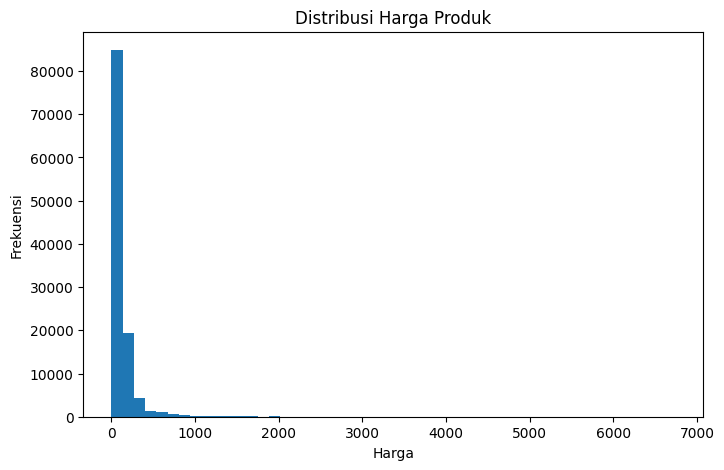

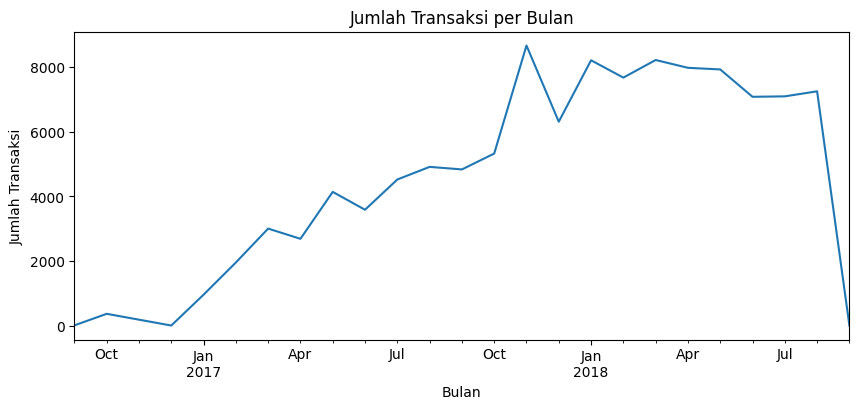

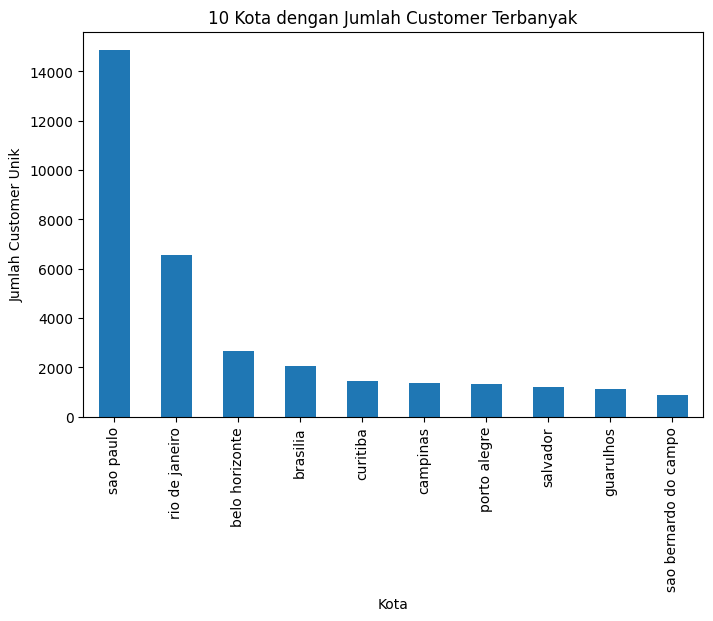

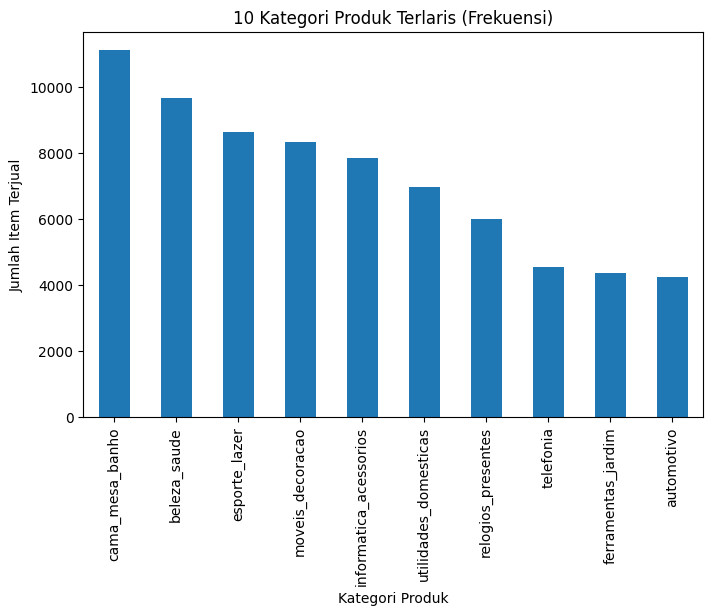

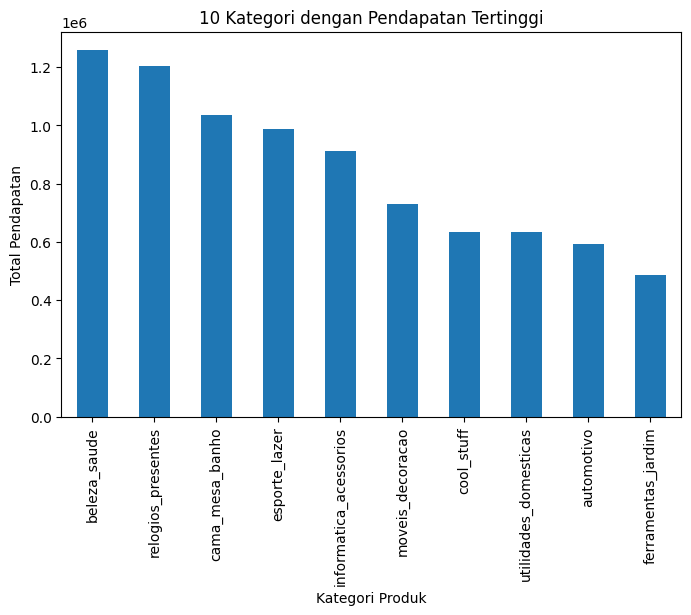

In [15]:
plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=50)
plt.title("Distribusi Harga Produk")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()

df["order_purchase_timestamp"].dt.to_period("M").value_counts().sort_index().plot(figsize=(10,4))
plt.title("Jumlah Transaksi per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.show()

city_counts = df.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(8,5))
city_counts.head(10).plot(kind='bar')
plt.title("10 Kota dengan Jumlah Customer Terbanyak")
plt.xlabel("Kota")
plt.ylabel("Jumlah Customer Unik")
plt.show()


category_counts = df['product_category_name'].value_counts().head(10)

plt.figure(figsize=(8,5))
category_counts.plot(kind='bar')
plt.title("10 Kategori Produk Terlaris (Frekuensi)")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Item Terjual")
plt.show()

revenue_by_category = df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
revenue_by_category.plot(kind='bar')
plt.title("10 Kategori dengan Pendapatan Tertinggi")
plt.xlabel("Kategori Produk")
plt.ylabel("Total Pendapatan")
plt.show()



**Insight:**
1. Distribusi Harga Produk
- mayoritas transaksi terjadi pada rentang harga rendah
2. Jumlah Transaksi Perbulan
- Jumlah transaksi menunjukkan tren meningkat dari waktu ke waktu dan penurunan drastis yang dicurigai sebagai potensi data tidak lengkap
3. 10 Kota dengan Jumlah Customer Terbanyak
- São Paulo memiliki jumlah customer paling tinggi
- Selisih São Paulo dengan kota lain sangat besar
- Jumlah customer tidak tersebar merata antar kota, dengan São Paulo memiliki jumlah customer yang jauh lebih besar dibandingkan kota lainnya.
4. 10 Kategori Produk Terlaris
- cama_mesa_banho memiliki frekuensi tertinggi
- Beberapa kategori lain memiliki frekuensi yang relatif berdekatan
- Tidak ada satu kategori yang mendominasi secara ekstrem

## Visualization & Explanatory Analysis

Visualisasi data berperan penting dalam menyampaikan insight secara jelas karena mampu mengubah data yang kompleks menjadi informasi yang mudah dipahami dan cepat ditangkap. Melalui visualisasi yang tepat, informasi dalam data dapat terlihat secara intuitif. Visualisasi juga membantu mengurangi kesalahpahaman dan memudahkan audiensdalam memahami data, sehingga informasi dapat dikomunikasikan secara efektif.

### Pertanyaan 1:

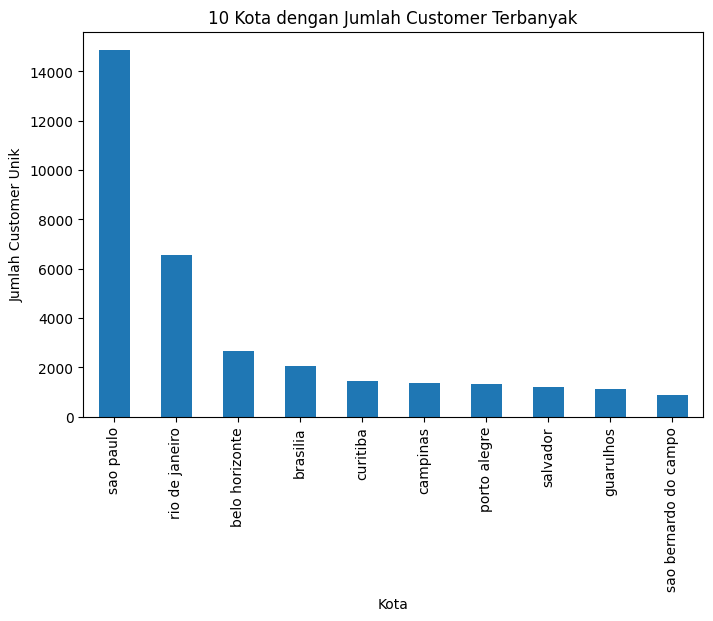

In [16]:
plt.figure(figsize=(8,5))
city_counts.head(10).plot(kind='bar')
plt.title("10 Kota dengan Jumlah Customer Terbanyak")
plt.xlabel("Kota")
plt.ylabel("Jumlah Customer Unik")
plt.show()


**Insight:**
- São Paulo merupakan kota dengan jumlah customer terbanyak dan memiliki selisih yang signifikan dibandingkan kota lainnya. Hal ini menunjukkan bahwa basis customer dalam dataset ini terkonsentrasi pada beberapa kota utama.

### Pertanyaan 2:

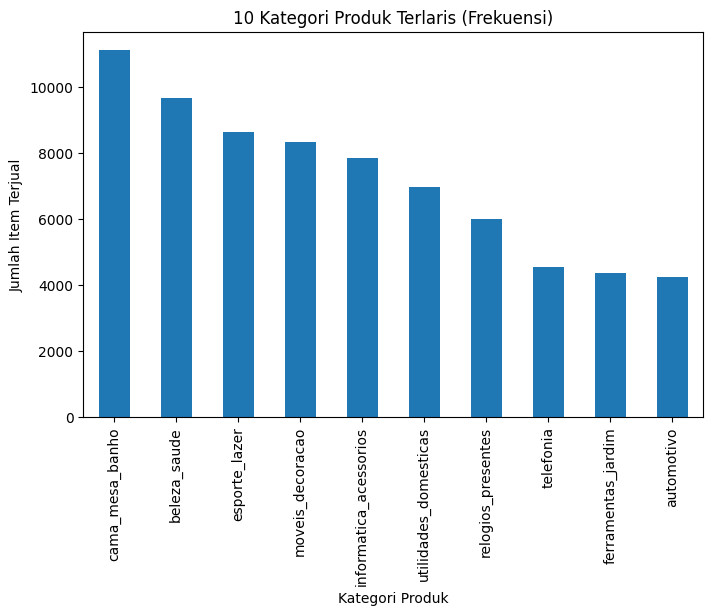

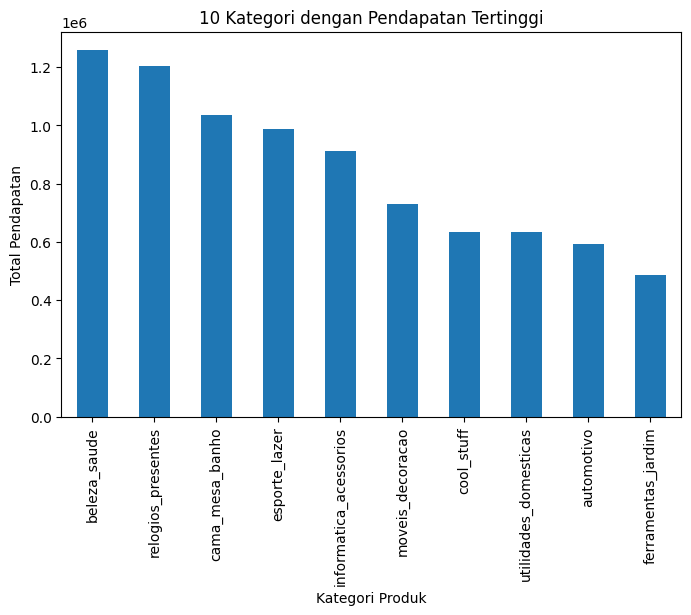

In [17]:
plt.figure(figsize=(8,5))
category_counts.plot(kind='bar')
plt.title("10 Kategori Produk Terlaris (Frekuensi)")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Item Terjual")
plt.show()

plt.figure(figsize=(8,5))
revenue_by_category.plot(kind='bar')
plt.title("10 Kategori dengan Pendapatan Tertinggi")
plt.xlabel("Kategori Produk")
plt.ylabel("Total Pendapatan")
plt.show()


**Insight:**
- Kategori cama_mesa_banho memiliki jumlah penjualan tertinggi dibandingkan kategori lainnya
- Beberapa kategori yang tidak berada pada peringkat teratas dalam jumlah penjualan tetap menghasilkan pendapatan tinggi, menunjukkan bahwa volume penjualan dan total pendapatan tidak linear.

## Conclusion

1. Kota mana yang memiliki jumlah customers terbanyak?
- Kota yang memiliki customer terbanyak adalah São Paulo yang sangat mendoninasi di bandingkan kota lainnya
- Distribusi customer menunjukkan bahwa jumlah customer tidak merata antar kota. Terdapat kota yang mendominasi jumlah customer.
- terbesar karena memiliki kontribusi transaksi yang signifikan.

2. Kategori produk apa yang paling banyak terjual dan menghasilkan pendapatan tertinggi?
- Kategori produk yang banyak terjual adalah cama_mesa_banho sedangkan yang menghasilkan pendapatan tertinggi adalah beleza_saude
- Tidak semua kategori dengan jumlah transaksi tinggi menghasilkan pendapatan tertinggi. Terdapat kategori yang sering dibeli dengan harga relatif rendah dan jarang dibeli tetapi berkontribusi besar pada revenue
- strategi bisnis perlu disesuaikan berdasarkan produk berorientasi volume dan produk berorientasi pendapatan

## simpan data

In [20]:
df.to_csv("data_ecommerce.csv", index=False)